# Theta oscillation

In this _in silico_ experiment, we will analyze theta oscillation in a microcircuit consisting of one pyramidal cell (PC), sampled from the middle of the rCA1-CYLINDER-REF, and eight parvalbumin-positive (PV+) interneurons converging onto the PC.

We previously ran one simulation where:
1) the external calcium concentration was set to 1 mM to mimic _in vivo_-like conditions
2) all the neurons were stimulationed with a depolarization of 120% (where a stimulation of 100% correspond to the voltage threshold for spike generation)
3) we applied an ACh of 1 µM which affects both neuron excitability and synapse release probability
4) PV+ neurons were sitmulated with an oscillatory current of amplitude 0.2 nA and frequency 8 Hz

In [1]:
import bluepysnap
import matplotlib.pyplot as plt

## Loading
In order to load the simulation data, we need the path to the file.

In [2]:
simulation_path = "/Users/armando/Desktop/Models/simulations/N_9__rCA1-ThetaOsc-Sel1__swc/theta/simulation_config.json"
simulation = bluepysnap.Simulation(simulation_path)

There are two different possible report types `'soma_report'` and `'compartment_report'`. In this tutorial, we only work with `'soma_report'` but they work exactly in the same way. Available frame reports can be shown with

In [3]:
simulation.reports

{'SomaVoltRec': <bluepysnap.frame_report.SomaReport at 0x12b76ff70>}

In [4]:
soma_report = simulation.reports['SomaVoltRec']

## Timing

As with the `Simulation` instance, it's easy to access report start and end time, as well as the time step (dt) and time_units

In [5]:
print(
    soma_report.time_start, 
    soma_report.time_stop, 
    soma_report.dt,
    soma_report.time_units
)

0.0 2000.0 0.025 ms


## Populations
If we are interested in the populations in frame report, they can be shown with

In [1]:
soma_report.population_names

NameError: name 'soma_report' is not defined

In [7]:
soma_pop = soma_report['hippocampus_neurons']
print(type(soma_pop))

<class 'bluepysnap.frame_report.PopulationSomaReport'>


Accessing the actual NodePopulation from the report can be done with

In [8]:
node_population = soma_pop.nodes
print(f'{node_population.name}: {type(node_population)}')

hippocampus_neurons: <class 'bluepysnap.nodes.node_population.NodePopulation'>


## Node IDs
Accessing the node_ids in the report and getting their info is the same as in the SpikeReport

In [9]:
ids = soma_pop.node_ids
node_population.get(ids, properties=['layer','synapse_class','x','y','z']).head()

,layer,synapse_class,x,y,z
node_ids,,,,,
0,SP,EXC,2614.981470,443.526012,4360.400973
1,SP,INH,2448.882424,420.070191,4545.937066
2,SP,INH,2383.241273,407.206940,4348.334404
3,SP,INH,2757.379176,528.859665,4458.257239
4,SP,INH,2504.818178,439.365759,4423.936844


## Filtering
We can filter the report the same way as in SpikeReport. Just as in SpikeReport, the index are different moments of time. Please note that this time, as there is more data in the output, the columns represent the population names and the ids.

In [10]:
filtered = soma_report.filter(group=[0,1])
df = filtered.report
df.head()

hippocampus_neurons           
                        0          1
0.000          -65.000000 -65.000000
0.025          -64.313759 -64.692551
0.050          -63.954216 -64.468842
0.075          -63.691696 -64.278618
0.100          -63.475517 -64.107773

## Spike times

We can now access the simulation spike report, filter them, and extract the values for the spike times.

This is necessary only for plotting puposes.

In [11]:
spikes = simulation.spikes
pc_spikes = spikes.filter(group={'synapse_class':'EXC'})
pc_spike_times = pc_spikes.report.index.values
pc_spike_times

array([  12.575     ,  234.55      ,  468.35      ,  703.05      ,
        994.375     , 1237.625     , 1485.8       , 1742.025     ,
       1975.05000001])

## Plotting

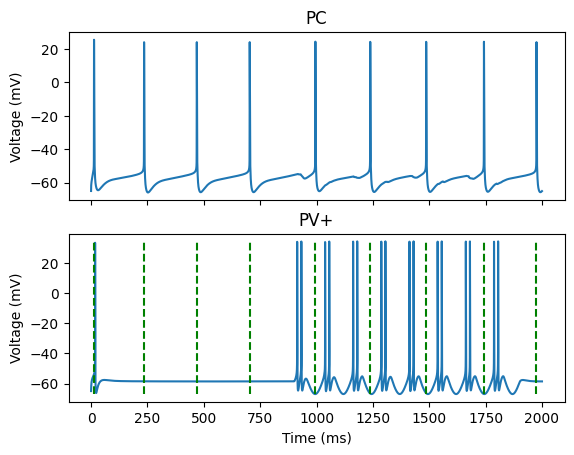

In [13]:
fig, axs = plt.subplots(2, sharex=True)

x = df.index.values
y0 = df['hippocampus_neurons'][0].values
y1 = df['hippocampus_neurons'][1].values

axs[0].plot(x, y0)
axs[0].title.set_text('PC')
axs[0].set_ylabel('Voltage (mV)')

axs[1].plot(x, y1)
axs[1].title.set_text('PV+')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Voltage (mV)')

# Copy PC spike times into PV+ somatic voltage plot
axs[1].vlines(pc_spike_times, ymin=y1.min(), ymax=y1.max(), colors='green', ls='--')

filename = '/Users/armando/Desktop/Models/simulations/N_9__rCA1-ThetaOsc-Sel1__swc/theta/results/traces.png'
plt.savefig(filename, bbox_inches='tight')
plt.show()

## Discussion
As soon as the oscillatory input is switched on, the PV+ spikes at ~8Hz and reset the PC spiking. We reproduced in a small microcircuit a phenomen that occurs at larger scale. However, we have to notice that the proportion of the neurons is far from the reality, so it is important to mention that the interations in this test circuit can be quite different from the most complete circuit shown in Romani et al. (2024).

## References
Romani A, Antonietti A, Bella D, Budd J, Giacalone E, Kurban K, Sáray S, Abdellah M, Arnaudon A, Boci E, Colangelo C, Courcol JD, Delemontex T, Ecker A, Falck J, Favreau C, Gevaert M, Hernando JB, Herttuainen J, Ivaska G, Kanari L, Kaufmann AK, King JG, Kumbhar P, Lange S, Lu H, Lupascu CA, Migliore R, Petitjean F, Planas J, Rai P, Ramaswamy S, Reimann MW, Riquelme JL, Román Guerrero N, Shi Y, Sood V, Sy MF, Van Geit W, Vanherpe L, Freund TF, Mercer A, Muller E, Schürmann F, Thomson AM, Migliore M, Káli S, Markram H. Community-based reconstruction and simulation of a full-scale model of the rat hippocampus CA1 region. PLoS Biol. 2024 Nov 5;22(11):e3002861. doi: 10.1371/journal.pbio.3002861. PMID: 39499732; PMCID: PMC11537418.
https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.3002861